In [5]:
import os
import pickle
import numpy as np

naive_results = {}
ltrwe_results = {}
sss_results   = {}

error_rates = np.linspace(0, 1, 20)
for (idx, error_rate) in zip(range(0, len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        naive_results.update({error_rate: pickle.load(F)})
for (idx, error_rate) in zip(range(len(error_rates), 2*len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        ltrwe_results.update({error_rate: pickle.load(F)})
for (idx, error_rate) in zip(range(2*len(error_rates), 3*len(error_rates)), error_rates):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        sss_results.update({error_rate: pickle.load(F)})

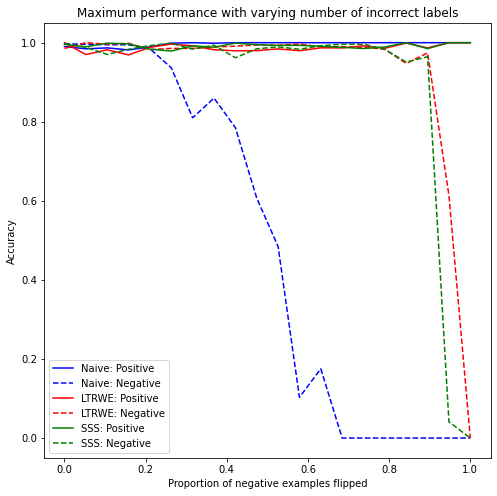

In [8]:
import numpy as np
from matplotlib import pyplot as plt

def get_performance_vs_error_rate_trace(results_dict):
    x = np.array(error_rates)
    y_pos = []
    y_neg = []
    for error_rate in error_rates:
        results = results_dict[error_rate]
        yy_pos = np.array(results['test_positive_acc']['values'])
        yy_neg = np.array(results['test_negative_acc']['values'])
        max_accuracy_idx = np.argmax(yy_pos+yy_neg)
        y_pos.append(yy_pos[max_accuracy_idx])
        y_neg.append(yy_neg[max_accuracy_idx])
    y_pos = np.array(y_pos)
    y_neg = np.array(y_neg)
    return x, y_pos, y_neg

(fig, ax) = plt.subplots(1, 1, figsize=(8, 8))

x, y_pos, y_neg = get_performance_vs_error_rate_trace(naive_results)
ax.plot(x, y_pos, linestyle='-', color='blue', label='Naive: Positive')
ax.plot(x, y_neg, linestyle='--', color='blue', label='Naive: Negative')

x, y_pos, y_neg = get_performance_vs_error_rate_trace(ltrwe_results)
ax.plot(x, y_pos, linestyle='-', color='red', label='LTRWE: Positive')
ax.plot(x, y_neg, linestyle='--', color='red', label='LTRWE: Negative')

x, y_pos, y_neg = get_performance_vs_error_rate_trace(sss_results)
ax.plot(x, y_pos, linestyle='-', color='green', label='SSS: Positive')
ax.plot(x, y_neg, linestyle='--', color='green', label='SSS: Negative')

ax.set_xlabel('Proportion of negative examples flipped')
ax.set_ylabel('Accuracy')
ax.set_title('Maximum performance with varying number of incorrect labels')
ax.legend()